In [1]:
from magnetic_field import *
from utils import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

exact_value = -8.56677223
bn_list = create_bn_list(7)

In [38]:
def run(method, nqubit, depth_list, bn_type=None, bn_range=None, bn_value=None):
    results = []
    for depth in depth_list:
        result = getResult(nqubit, depth, method, bn_type, bn_range, bn_value)
        if result == None:
            continue
#         print("%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s" % (result["method"], result["depth"], result["bn_type"], result["bn_value"], result["cost"]["min"], result["cost"]["max"], result["cost"]["mean"], result["cost"]["std"], result["iter"]["min"], result["iter"]["max"], result["iter"]["mean"], result["iter"]["std"]))
        results.append(result)
    return results

vqe_results = []
nqubit = 7
method = 'indirect_ising'
depth_list = [16,20,24,28]
vqe_results.extend(run(method, nqubit, depth_list, 'static_random', 2, None))
for bn in bn_list:
    vqe_results.extend(run(method, nqubit, depth_list, 'static', None, bn))

method = 'indirect_xy'
depth_list = [12,16,20,24,28,32]
vqe_results.extend(run(method, nqubit, depth_list, 'static_random', 2, None))
for bn in bn_list:
    vqe_results.extend(run(method, nqubit, depth_list, 'static', None, bn))

method = 'indirect_xyz'
depth_list = [8,12,16,20,24,28]
vqe_results.extend(run(method, nqubit, depth_list, None, None, None))

In [39]:
plot_list = {}
for result in vqe_results:
    if result['bn_type'] == 'static_random':
        if ("%s-depth" % result['method']) not in plot_list.keys():
            plot_list["%s-depth" % result['method']] = [result['depth']]
            plot_list["%s-cost-min" % result['method']] = [result['cost']['min']]
            plot_list["%s-cost-mean" % result['method']] = [result['cost']['mean']]
        else:
            plot_list["%s-depth" % result['method']].append(result['depth'])
            plot_list["%s-cost-min" % result['method']].append(result['cost']['min'])
            plot_list["%s-cost-mean" % result['method']].append(result['cost']['mean'])
    elif result['method'] == 'indirect_xyz':
        if ("%s-depth" % result['method']) not in plot_list.keys():
            plot_list["%s-depth" % result['method']] = [result['depth']]
            plot_list["%s-cost-min" % result['method']] = [result['cost']['min']]
            plot_list["%s-cost-mean" % result['method']] = [result['cost']['mean']]
        else:
            plot_list["%s-depth" % result['method']].append(result['depth'])
            plot_list["%s-cost-min" % result['method']].append(result['cost']['min'])
            plot_list["%s-cost-mean" % result['method']].append(result['cost']['mean'])

def create_graph(title):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("expectation value")
    plt.ylim(-9.0, -5.0)

plot_list.keys()

dict_keys(['indirect_ising-depth', 'indirect_ising-cost-min', 'indirect_ising-cost-mean', 'indirect_xy-depth', 'indirect_xy-cost-min', 'indirect_xy-cost-mean', 'indirect_xyz-depth', 'indirect_xyz-cost-min', 'indirect_xyz-cost-mean'])

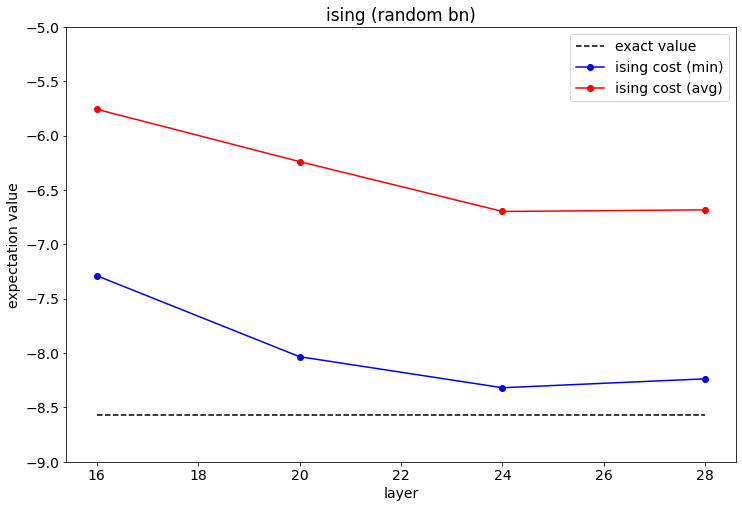

In [40]:
create_graph("ising (random bn)")
plt.hlines(exact_value, min(plot_list['indirect_ising-depth']), max(plot_list['indirect_ising-depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_ising-depth'], plot_list['indirect_ising-cost-min'], marker='o', color='blue', label='ising cost (min)')
plt.plot(plot_list['indirect_ising-depth'], plot_list['indirect_ising-cost-mean'], marker='o', color='red', label='ising cost (avg)')
plt.legend()
plt.savefig('ising_random_bn.png')

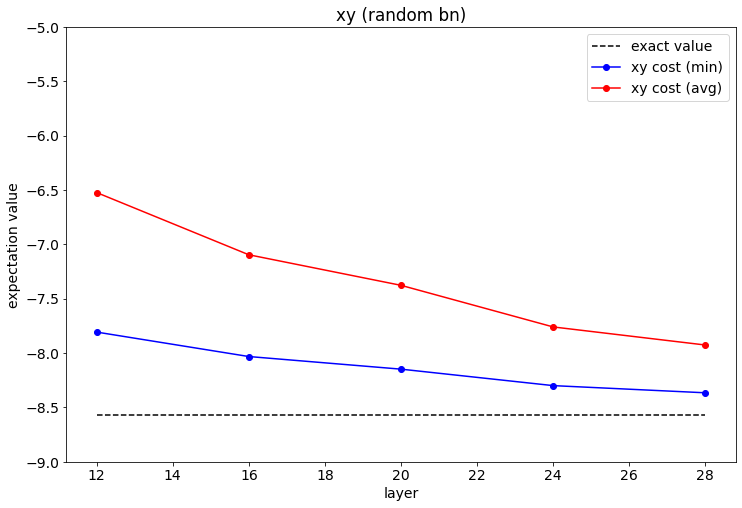

In [41]:
create_graph("xy (random bn)")
plt.hlines(exact_value, min(plot_list['indirect_xy-depth']), max(plot_list['indirect_xy-depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_xy-depth'], plot_list['indirect_xy-cost-min'], marker='o', color='blue', label='xy cost (min)')
plt.plot(plot_list['indirect_xy-depth'], plot_list['indirect_xy-cost-mean'], marker='o', color='red', label='xy cost (avg)')
plt.legend()
plt.savefig('xy_random_bn.png')

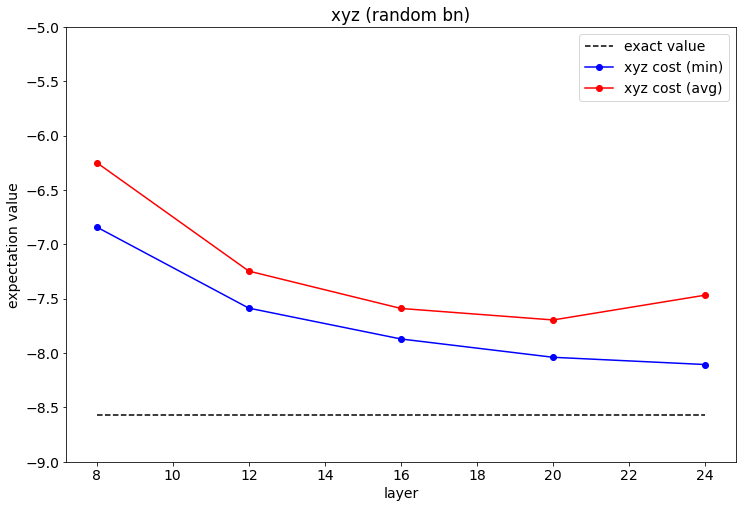

In [42]:
create_graph("xyz (random bn)")
plt.hlines(exact_value, min(plot_list['indirect_xyz-depth']), max(plot_list['indirect_xyz-depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_xyz-depth'], plot_list['indirect_xyz-cost-min'], marker='o', color='blue', label='xyz cost (min)')
plt.plot(plot_list['indirect_xyz-depth'], plot_list['indirect_xyz-cost-mean'], marker='o', color='red', label='xyz cost (avg)')
plt.legend()
plt.savefig('xyz_random_bn.png')

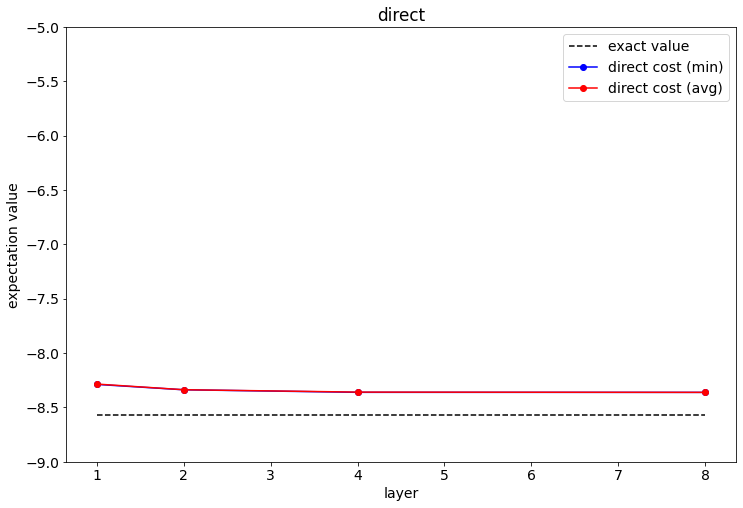

In [43]:
## 直接制御
method = 'direct'
depth_list = [1,2,4,8]
direct_results = run(method, nqubit, depth_list)

d_plot_list = {}

for result in direct_results:
    if 'depth' not in d_plot_list.keys():
        d_plot_list["depth"] = [result['depth']]
        d_plot_list["cost-min"] = [result['cost']['min']]
        d_plot_list["cost-mean"] = [result['cost']['mean']]
    else:
        d_plot_list["depth"].append(result['depth'])
        d_plot_list["cost-min"].append(result['cost']['min'])
        d_plot_list["cost-mean"].append(result['cost']['mean'])

create_graph("direct")
plt.hlines(exact_value, min(d_plot_list['depth']), max(d_plot_list['depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(d_plot_list['depth'], d_plot_list['cost-min'], marker='o', color='blue', label='direct cost (min)')
plt.plot(d_plot_list['depth'], d_plot_list['cost-mean'], marker='o', color='red', label='direct cost (avg)')
plt.legend()
plt.savefig('direct.png')